# Data and Plots

Here we'll demo some of the features of the Plots package in Julia.

You can find documentation [here](http://docs.juliaplots.org/latest/).

There are several backends you can use for Plots.  Try out [PyPlot](https://github.com/JuliaPy/PyPlot.jl), [PlotlyJS](http://spencerlyon.com/PlotlyJS.jl/) and/or [GR](https://github.com/jheinen/GR.jl).

Note that different backends may support different behavior.

In [1]:
using Pkg; Pkg.add(["Plots", "StatsPlots", "DataFrames", "RDatasets", "ProgressMeter", "LightGraphs", "GraphPlot", "Compose"])
using Plots, StatsPlots, DataFrames, RDatasets, LightGraphs, GraphPlot, Compose

┌ Info: Recompiling stale cache file /Users/macuser/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /Users/macuser/.julia/compiled/v1.2/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1240


# Quick Intro to DataFrames

[DataFrames](https://juliadata.github.io/DataFrames.jl/latest/) are for working with tabular data in Julia.  Many features will be familiar if you have used pandas in Python, or R.

The [RDatasets](https://github.com/johnmyleswhite/RDatasets.jl) package provides a way to access many common test datasets used in R in Julia.

For handling a variety of data, check out the [Query.jl](http://www.david-anthoff.com/Query.jl/stable/) package.

In [2]:
using DataFrames, RDatasets
iris = dataset("datasets","iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


You can access columns of a dataframe using a [symbol](https://docs.julialang.org/en/stable/manual/metaprogramming/#Symbols-1) (for now, think of it as a type of string), or regular array indexing

In [3]:
@show iris[!,:SepalLength]
@show iris[1,:]
@show iris[:,1]
;

iris[!, :SepalLength] = [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]
iris[1, :] = DataFrameRow
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species      │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ Categorical… │
├─────┼─────────────┼────────────┼───────────

# StatsPlots

The [StatsPlots](https://github.com/JuliaPlots/StatsPlots.jl) package is built on top of the Plots package, and provides statistics-related functionality, and works well with DataFrames.

In [20]:
using LinearAlgebra
A = zeros(10,10)
for i = 1:10
    A[i,i] = 1
end
A

10×10 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [16]:
using Pkg
Pkg.add("StatsPlots")

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


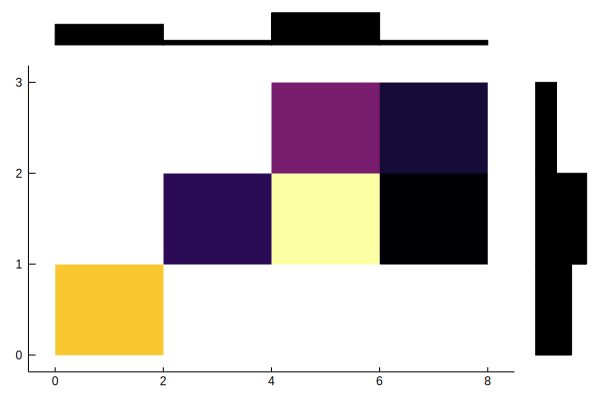

In [7]:
@df iris marginalhist(:PetalLength, :PetalWidth)

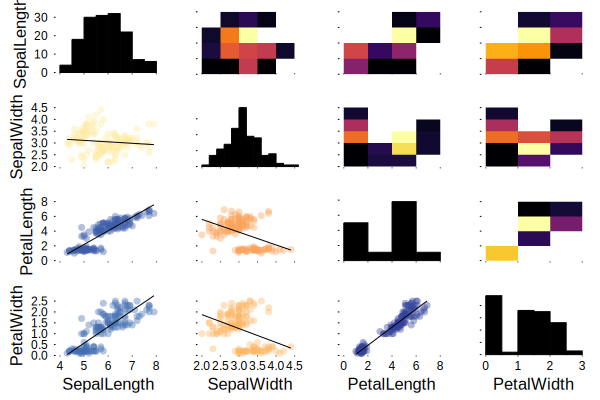

In [8]:
@df iris corrplot(cols(1:4), grid = false)

# Plots

We've already played around a bit with basic plots.  Here, we'll look at a few more topics

## Subplots

For more information on layouts, see [here](http://docs.juliaplots.org/latest/layouts/)


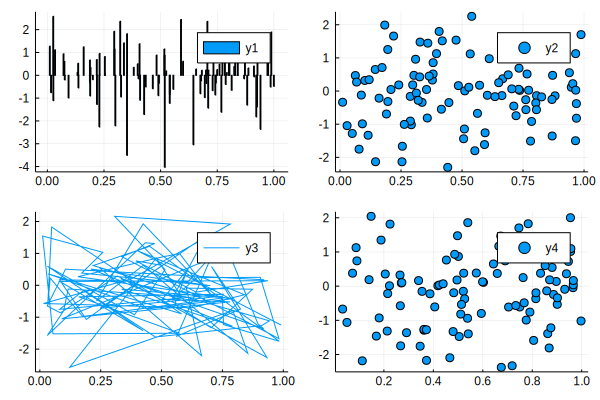

In [10]:
plot(rand(100,4), randn(100,4), layout=StatsPlots.grid(2,2), seriestype=[:bar :scatter :path :scatter])

## PlotlyJS

PlotlyJS is a Javascript library for plotting, and allows for some interactivity with plots

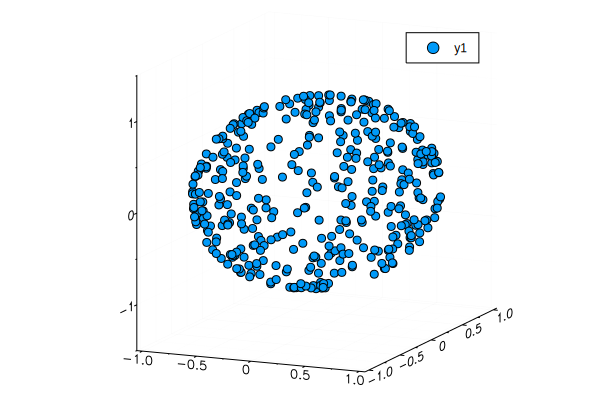

In [11]:
function sample_sphere(n::Int64)
    X = randn(3,n)
    norms = sqrt.(sum(X.^2,dims=1))
    for j = 1:n
        for i = 1:3
           X[i,j] = X[i,j]/norms[j] 
        end
    end
    return X
end
X = sample_sphere(400)
scatter(X[1,:], X[2,:], X[3,:])

## Making a gif

You can see some cool examples of this on the [Plots.jl homepage](http://docs.juliaplots.org/latest/).  The basic tool is the ```@gif``` macro

In [12]:
using Plots, ProgressMeter
plot(leg=false, ticks=nothing)
n = 50
ts = range(-π,π,length=n)
xs = range(-5*π, 5*π, length = 300)

# create a progress bar for tracking the animation generation
prog = Progress(n,1)
@gif for t in ts
    plot(xs, sin.(xs.-t))
    #step the progress counter
    next!(prog)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
┌ Info: Saved animation to 
│   fn = /Users/macuser/Documents/cme257/cme257-advanced-julia/class/class3/tmp.gif
└ @ Plots /Users/macuser/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/macuser/Documents/cme257/cme257-advanced-julia/class/class3/tmp.gif")

# Graphs and Graph Visualization

* If you would like to work with graphs in Julia, it is sometimes helpful to be able to plot them. The package LightGraphs provides a convenient interface for working with them. 

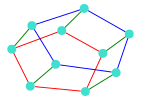

In [13]:
G = Graph(10)
for i = 0:4
    add_edge!(G,i+1,(i+1)%5+1)
end
for i = 0:4
    add_edge!(G,i+6,(i+1)%5+6)
end
for i = 0:4
    add_edge!(G,i+1,i+6)
end
edgecolors = [colorant"lightgray" for i = 1:15]
edgelist = collect(edges(G))
for i = 1:15
    if edgelist[i].src <= 5 && edgelist[i].dst <= 5
        edgecolors[i] = colorant"red"
    elseif edgelist[i].src > 5 && edgelist[i].dst > 5
        edgecolors[i] = colorant"blue"
    else
        edgecolors[i] = colorant"green"
    end
end

gplot(G,edgestrokec=edgecolors) #a very famous graph

We can also color the edges in the generated plot: here I color the edges of a spanning tree.

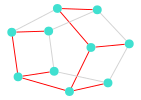

In [14]:
new_edgecolors = [colorant"lightgray" for i = 1:15]
T = Graph(kruskal_mst(G))
for i = 1:15
    e = edgelist[i]
    if has_edge(T,e.src,e.dst)
        new_edgecolors[i] = colorant"red"
    end
end
gplot(G,edgestrokec=new_edgecolors)

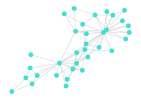

In [15]:
#another famous social networks graph
g = graphfamous("karate")
gplot(g)

# Exercises/Extras

* Take some data that you have for one reason or another, and try visualizing it in a fun/useful way
* Try out the [Interact.jl](https://github.com/JuliaGizmos/Interact.jl) package, and make an interactive plot.
* Look at some of the advanced plot layout functionality, and try out the [examples](http://docs.juliaplots.org/latest/layouts/)

